In [228]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import copy
warnings.filterwarnings('ignore')


In [229]:
#Loading the Dataset
data = pd.read_csv(r'D:\janakpuri project\30.06.25\30th jun nse bse.csv',index_col='S.No.') 


In [230]:
# creating a copy for not allow changes in original data 
df = copy.deepcopy(data)

In [231]:
df.head(5)   # first 5 rows 

,Product,Exchange,Symbol,Net Qty,Buy Qty,Buy Avg Price,Buy Value,Sell Qty,Sell Avg Price,Sell Value,Carry Fwd Qty,Realized Profit,Unrealized Profit,P&L,UserID
S.No.,,,,,,,,,,,,,,,
1,NRML,NFO,NIFTY2570324550PE,0,225,4.133333,930.00,225,2.850,641.25,0,-288.75,0.0,-288.75,SIM1
2,NRML,NFO,NIFTY2570326350CE,0,150,4.275000,641.25,150,3.300,495.00,0,-146.25,0.0,-146.25,SIM1
3,NRML,BFO,SENSEX2570184500CE,0,40,41.800000,1672.00,40,130.050,5202.00,0,3530.00,0.0,3530.00,SIM1
4,NRML,BFO,SENSEX2570183500PE,0,40,175.325000,7013.00,40,124.050,4962.00,0,-2051.00,0.0,-2051.00,SIM1
5,NRML,NFO,NIFTY2570325700CE,0,150,62.750000,9412.50,150,109.325,16398.75,0,6986.25,0.0,6986.25,SIM1


In [232]:
df.tail(5)   # last 5 rows 

,Product,Exchange,Symbol,Net Qty,Buy Qty,Buy Avg Price,Buy Value,Sell Qty,Sell Avg Price,Sell Value,Carry Fwd Qty,Realized Profit,Unrealized Profit,P&L,UserID
S.No.,,,,,,,,,,,,,,,
18,NRML,NFO,NIFTY2570325550CE,0,75,119.4500,8958.75,75,120.60,9045.0,0,86.25,0.0,86.25,SIM1
19,NRML,NFO,NIFTY2570325400PE,0,75,70.9500,5321.25,75,83.30,6247.5,0,926.25,0.0,926.25,SIM1
20,NRML,BFO,SENSEX2570183000PE,0,20,60.8500,1217.00,20,96.30,1926.0,0,709.00,0.0,709.00,SIM1
21,NRML,BFO,SENSEX2570184100CE,0,20,102.3000,2046.00,20,119.00,2380.0,0,334.00,0.0,334.00,SIM1
22,NRML,NFO,NIFTY2570325500CE,0,300,142.0375,42611.25,300,136.55,40965.0,0,-1121.25,-525.0,-1646.25,SIM1


In [ ]:
print(f'total rows = {df.shape[0]} \ntotal columns = {df.shape[1]}')  # analyze total rows and column in data 

total rows = 22 
total columns = 15


In [ ]:
df.info()    # full information about the data 

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 1 to 22
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product            22 non-null     object 
 1   Exchange           22 non-null     object 
 2   Symbol             22 non-null     object 
 3   Net Qty            22 non-null     int64  
 4   Buy Qty            22 non-null     int64  
 5   Buy Avg Price      22 non-null     float64
 6   Buy Value          22 non-null     float64
 7   Sell Qty           22 non-null     int64  
 8   Sell Avg Price     22 non-null     float64
 9   Sell Value         22 non-null     float64
 10  Carry Fwd Qty      22 non-null     int64  
 11  Realized Profit    22 non-null     float64
 12  Unrealized Profit  22 non-null     float64
 13  P&L                22 non-null     float64
 14  UserID             22 non-null     object 
dtypes: float64(7), int64(4), object(4)
memory usage: 2.8+ KB


In [235]:
# check missing values 
if df.isnull().sum().all() == 0:
    print("no missing value")
else:
    print("missing value found")
    print(df.isnull().sum() >= 1)

no missing value


In [236]:
# df.isnull().sum() >= 1

In [237]:
# creating function to extract type(ce/pe) from symbol data 
def type_check(value):
    if value.endswith('CE'):
        return 'CE'
    elif value.endswith('PE'):
        return 'PE'
    else:
        return 'not a valid call put data'

In [238]:
# Adding the CE/PE type Column in dataframe 
df['Type'] = df['Symbol'].apply(type_check)

In [239]:
# Adding strike price Column 
df['Strike'] = df['Symbol'].str.extract(r'(\d{4,5})(?=CE|PE)')

In [240]:
df.head()

,Product,Exchange,Symbol,Net Qty,Buy Qty,Buy Avg Price,Buy Value,Sell Qty,Sell Avg Price,Sell Value,Carry Fwd Qty,Realized Profit,Unrealized Profit,P&L,UserID,Type,Strike
S.No.,,,,,,,,,,,,,,,,,
1,NRML,NFO,NIFTY2570324550PE,0,225,4.133333,930.00,225,2.850,641.25,0,-288.75,0.0,-288.75,SIM1,PE,24550
2,NRML,NFO,NIFTY2570326350CE,0,150,4.275000,641.25,150,3.300,495.00,0,-146.25,0.0,-146.25,SIM1,CE,26350
3,NRML,BFO,SENSEX2570184500CE,0,40,41.800000,1672.00,40,130.050,5202.00,0,3530.00,0.0,3530.00,SIM1,CE,84500
4,NRML,BFO,SENSEX2570183500PE,0,40,175.325000,7013.00,40,124.050,4962.00,0,-2051.00,0.0,-2051.00,SIM1,PE,83500
5,NRML,NFO,NIFTY2570325700CE,0,150,62.750000,9412.50,150,109.325,16398.75,0,6986.25,0.0,6986.25,SIM1,CE,25700


In [ ]:
df.columns.to_list()  # all columns list

['Product',
 'Exchange',
 'Symbol',
 'Net Qty',
 'Buy Qty',
 'Buy Avg Price',
 'Buy Value',
 'Sell Qty',
 'Sell Avg Price',
 'Sell Value',
 'Carry Fwd Qty',
 'Realized Profit',
 'Unrealized Profit',
 'P&L',
 'UserID',
 'Type',
 'Strike']

In [242]:
# reset columns for better view
df = df[['Product',
 'Exchange',
 'Symbol',
 'Type',
 'Strike',
 'Net Qty',
 'Buy Qty',
 'Buy Avg Price',
 'Buy Value',
 'Sell Qty',
 'Sell Avg Price',
 'Sell Value',
 'Carry Fwd Qty',
 'Realized Profit',
 'Unrealized Profit',
 'P&L',
 'UserID']]

#### Task 1 sort the data 

In [243]:
#normal sorting on the basis of P&L
sorted_data = df.sort_values(by='P&L',ascending=False)
sorted_data

,Product,Exchange,Symbol,Type,Strike,Net Qty,Buy Qty,Buy Avg Price,Buy Value,Sell Qty,Sell Avg Price,Sell Value,Carry Fwd Qty,Realized Profit,Unrealized Profit,P&L,UserID
S.No.,,,,,,,,,,,,,,,,,
5,NRML,NFO,NIFTY2570325700CE,CE,25700,0,150,62.750000,9412.50,150,109.32500,16398.75,0,6986.25,0.00,6986.25,SIM1
13,NRML,NFO,NIFTY2570325600CE,CE,25600,0,150,97.000000,14550.00,150,131.95000,19792.50,0,5242.50,0.00,5242.50,SIM1
8,NRML,NFO,NIFTY2570325650CE,CE,25650,0,75,78.450000,5883.75,75,130.95000,9821.25,0,3937.50,0.00,3937.50,SIM1
3,NRML,BFO,SENSEX2570184500CE,CE,84500,0,40,41.800000,1672.00,40,130.05000,5202.00,0,3530.00,0.00,3530.00,SIM1
12,NRML,BFO,SENSEX2570184300CE,CE,84300,0,40,65.975000,2639.00,40,140.65000,5626.00,0,2987.00,0.00,2987.00,SIM1
16,NRML,BFO,SENSEX2570183100PE,PE,83100,0,80,75.300000,6024.00,80,112.61250,9009.00,0,2985.00,0.00,2985.00,SIM1
19,NRML,NFO,NIFTY2570325400PE,PE,25400,0,75,70.950000,5321.25,75,83.30000,6247.50,0,926.25,0.00,926.25,SIM1
20,NRML,BFO,SENSEX2570183000PE,PE,83000,0,20,60.850000,1217.00,20,96.30000,1926.00,0,709.00,0.00,709.00,SIM1
17,NRML,BFO,SENSEX2570184200CE,CE,84200,0,20,82.500000,1650.00,20,100.50000,2010.00,0,360.00,0.00,360.00,SIM1


# Task 2 
- ### sum of value if strikes are same 

In [244]:

# Group by same Strike to sum Buy and Sell values 
grouped_data = df.groupby('Strike').agg({
    'Net Qty':'sum',
    'Buy Qty':'sum',
    'Buy Avg Price':'sum',
    'Buy Value': 'sum',
    'Sell Qty':'sum',
    'Sell Avg Price':'sum',
    'Sell Value' : 'sum',
    'P&L' : 'sum',
    'Type':lambda x:','.join(sorted(set(x)))
}).reset_index()


In [ ]:
# adding symbols data in grouped data 
symbol = df.groupby('Strike')['Symbol'].apply(lambda x : ",".join(x)).reset_index()
grouped_data = pd.merge(grouped_data,symbol,on='Strike',how='left',suffixes=['_grouped'])

In [ ]:
# adding column of total value & probability 
grouped_data['TotalValue'] = grouped_data['Buy Value']+grouped_data['Sell Value']
grouped_data['Probability'] = (grouped_data['P&L']/grouped_data['TotalValue'])*100


In [247]:
grouped_data.columns.to_list()

['Strike',
 'Net Qty',
 'Buy Qty',
 'Buy Avg Price',
 'Buy Value',
 'Sell Qty',
 'Sell Avg Price',
 'Sell Value',
 'P&L',
 'Type',
 'Symbol',
 'TotalValue',
 'Probability']

In [ ]:
# rerarrange the columns 
grouped_data = grouped_data[['Symbol',
 'Strike',
 'Net Qty',
 'Buy Qty',
 'Buy Avg Price',
 'Buy Value',
 'Sell Qty',
 'Sell Avg Price',
 'Sell Value',
 'P&L',
 'Type',
 'TotalValue',
 'Probability']]

In [ ]:
# sort the data from high to low
grouped_sorted = grouped_data.sort_values(by='P&L',ascending=False).reset_index(drop=True)

In [250]:
grouped_sorted

,Symbol,Strike,Net Qty,Buy Qty,Buy Avg Price,Buy Value,Sell Qty,Sell Avg Price,Sell Value,P&L,Type,TotalValue,Probability
0,NIFTY2570325700CE,25700,0,150,62.750000,9412.50,150,109.32500,16398.75,6986.25,CE,25811.25,27.066686
1,NIFTY2570325650CE,25650,0,75,78.450000,5883.75,75,130.95000,9821.25,3937.50,CE,15705.00,25.071633
2,SENSEX2570184500CE,84500,0,40,41.800000,1672.00,40,130.05000,5202.00,3530.00,CE,6874.00,51.352924
3,SENSEX2570184300CE,84300,0,40,65.975000,2639.00,40,140.65000,5626.00,2987.00,CE,8265.00,36.140351
4,SENSEX2570183100PE,83100,0,80,75.300000,6024.00,80,112.61250,9009.00,2985.00,PE,15033.00,19.856316
5,"NIFTY2570325600PE,NIFTY2570325600CE",25600,0,300,229.900000,34485.00,300,239.82500,35973.75,1488.75,"CE,PE",70458.75,2.112938
6,NIFTY2570325400PE,25400,0,75,70.950000,5321.25,75,83.30000,6247.50,926.25,PE,11568.75,8.006483
7,SENSEX2570183000PE,83000,0,20,60.850000,1217.00,20,96.30000,1926.00,709.00,PE,3143.00,22.558066
8,SENSEX2570184200CE,84200,0,20,82.500000,1650.00,20,100.50000,2010.00,360.00,CE,3660.00,9.836066
9,SENSEX2570184100CE,84100,0,20,102.300000,2046.00,20,119.00000,2380.00,334.00,CE,4426.00,7.546317


# task 3 
- ###  probability of top profits and top losses by premium

In [251]:
# top 3 profits premium
top3_profit = grouped_sorted.head(3)
top3_profit['profit_sum'] = top3_profit['P&L'].sum()
top3_profit['profit_premium_sum'] = df[df['Strike'].isin(top3_profit['Strike'])][['Buy Value', 'Sell Value']].sum().sum()
top3_profit['probability_profit'] = (top3_profit['profit_sum']/top3_profit['profit_premium_sum'])*100


In [252]:
# for better visualization
profit_sum = top3_profit['P&L'].sum()
profit_premium_sum = df[df['Strike'].isin(top3_profit['Strike'])][['Buy Value', 'Sell Value']].sum().sum()
prob_profit = (profit_sum/profit_premium_sum)*100

In [253]:
prob_profit

np.float64(29.869136861247874)

In [254]:
top3_profit['probability_profit']

0    29.869137
1    29.869137
2    29.869137
Name: probability_profit, dtype: float64

In [ ]:
print(f'Probability of profit = {top3_profit["probability_profit"].iloc[0]:.2f}%')   # probability of profit 


Probability of profit = 29.87%


- ##### For every ₹100 traded on the top 3 profitable strikes ₹29.87 was earned.

In [256]:
# top 3 losses
top3_loss = grouped_sorted.tail(3)
top3_loss['loss_sum'] = top3_loss['P&L'].sum()
top3_loss['loss_premium_sum'] = df[df['Strike'].isin(top3_loss['Strike'])][['Buy Value', 'Sell Value']].sum().sum()
top3_loss['probability_losses'] = (top3_loss['loss_sum']/top3_loss['loss_premium_sum'])*100

In [257]:
#for visualization
loss_sum = top3_loss['P&L'].sum()
loss_premium_sum = df[df['Strike'].isin(top3_loss['Strike'])][['Buy Value', 'Sell Value']].sum().sum()
prob_loss = (loss_sum/loss_premium_sum)*100

In [258]:
prob_loss

np.float64(-5.045148614188371)

In [259]:
top3_loss['probability_losses']

16   -5.045149
17   -5.045149
18   -5.045149
Name: probability_losses, dtype: float64

In [ ]:
print(f'probability of losses = {top3_loss["probability_losses"].iloc[0]:.2f}%')    # loss probability

probability of losses = -5.05%


- ##### For every ₹100 traded on the worst 3 strikes ₹5.05 was lost

In [261]:
# ALL profit 
profit = grouped_sorted[grouped_sorted['P&L']>0]
losses = grouped_sorted[grouped_sorted['P&L']<0]


# visualization

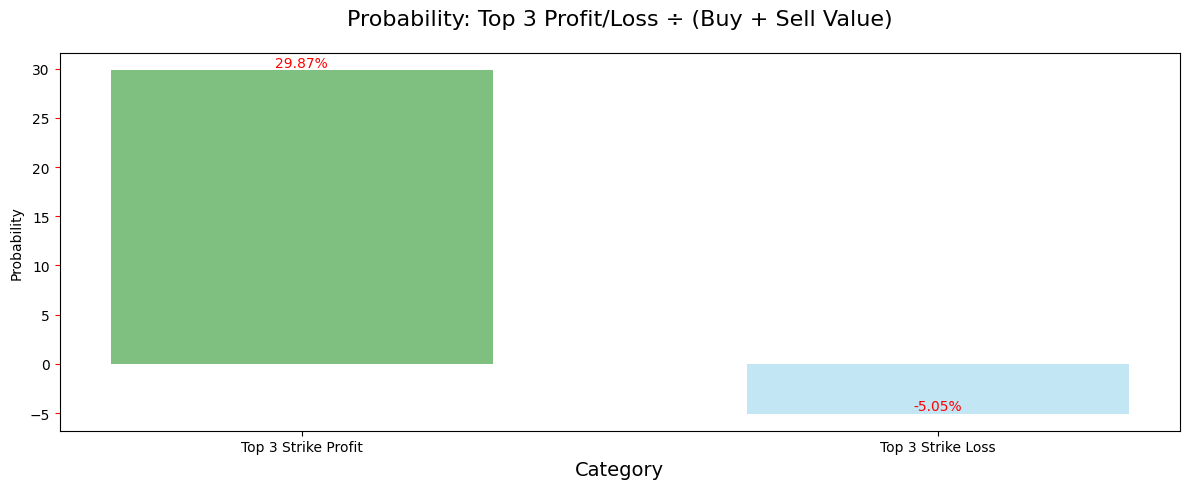

In [ ]:

# ploting a bar chart for better understanding of top 3 total loss and profit 
category = ['Top 3 Strike Profit','Top 3 Strike Loss']
value = [prob_profit,prob_loss]
fig,axis = plt.subplots(figsize=(12,5))
axis.bar(category,value,color=['green','skyblue'],alpha=0.5,width=0.6)
for index,value in enumerate(value):
    axis.text(index,value+0.01,f"{value:.2f}%",va='bottom',ha='center',color='red')
axis.set_xlabel('Category',fontsize=14)
axis.set_ylabel("Probability")
axis.tick_params(axis='y',color='red')

plt.title('Probability: Top 3 Profit/Loss ÷ (Buy + Sell Value)',fontsize=16,pad=20)
plt.tight_layout()
# plt.savefig('top3lossesprofitprobability.png',dpi=30)
plt.show()

#### Insights:
### 🟢 1. Top 3 Profitable Strike Price Levels
- ####  The top 3 profitable strikes generated a cumulative profit probability of ~29.87%.

- ##### This means:
##### 👉 For every ₹100 invested in Buy + Sell across these 3 strikes, the return was approximately ₹29.87.

- ##### These trades show strong profitability, suggesting either:

  - ##### Well-timed entries and exits

  - ##### Strong directional movement captured effectively

  - ##### Good liquidity at those strikes

##### ✅ Recommendation: These strike levels (based on expiry type and instrument) may indicate sweet spots for future focus or position sizing.

### 🔴 2. Top 3 Loss-Making Strike Price Levels
- #### The bottom 3 losing strikes gave a loss probability of ~−5.05%.

- #### This implies:
#### 👉 For every ₹100 traded on these strikes, about ₹5.05 was lost.

- ##### While the loss exists, it's relatively well-contained — showing good overall trade discipline.

##### ⚠️ Note: These strikes might be showing:

- ##### Poor momentum follow-through

- ##### Volatility mismatch

- ##### Low delta (for OTM trades) or sudden reversals





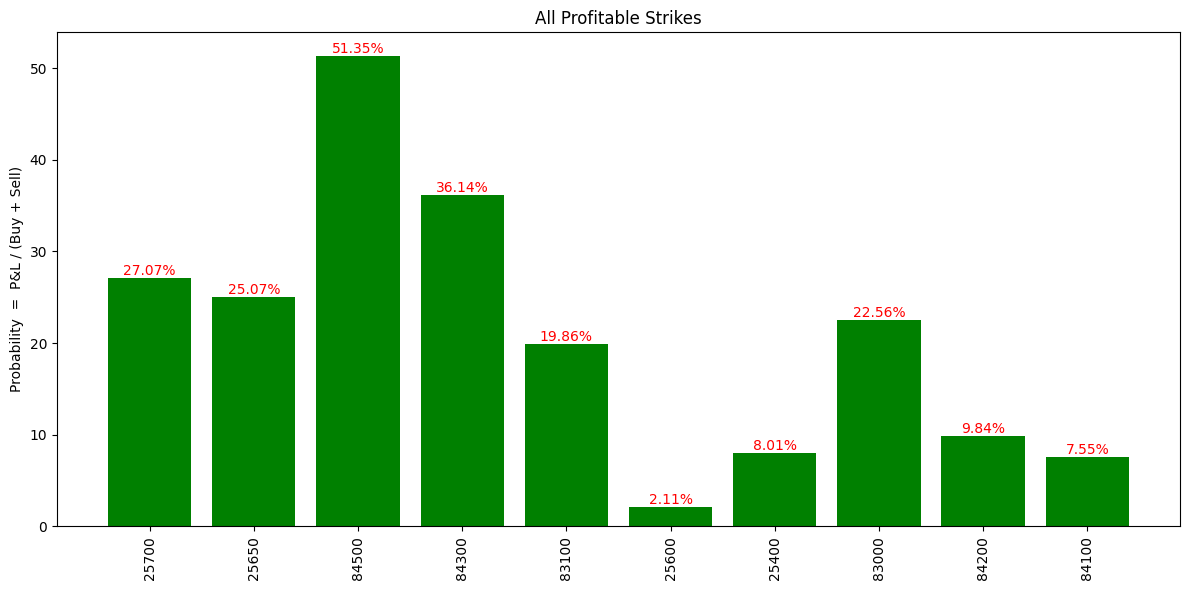

In [ ]:
# ploting bar graph for better presentation of all profitable data 
plt.figure(figsize=(12,6))
plt.bar(profit['Strike'].astype(str),
        profit['Probability'],
        color='green')
for i,v in enumerate(profit['Probability']):
    plt.text(i,v+0.01,f'{v:.2f}%',va='bottom',ha='center',color='red')
plt.title('All Profitable Strikes')
plt.ylabel('Probability  =  P&L / (Buy + Sell)')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('ALLprofitablestrikes.png',dpi=30)
plt.show()

## Insights:
### Profitable Strikes (Green Bars)
- #### These strikes had positive P&L values.

- #### Some strikes yielded 10%–30% return on total trade value, indicating high trade efficiency. 

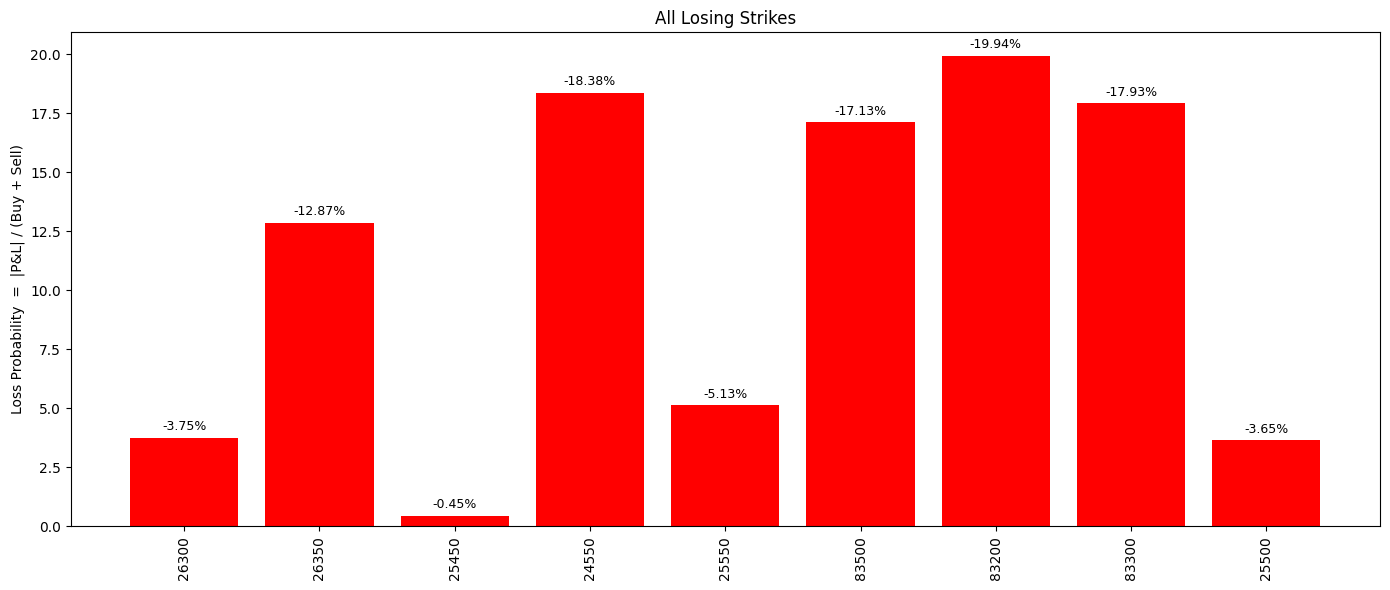

In [ ]:
# ploting a bar chart for better understanding on about all losing strikes data 
plt.figure(figsize=(14,6))
plt.bar(losses['Strike'].astype(str),
        losses['Probability'].abs(),      
        color='red')
for i, v in enumerate(losses['Probability']):
    plt.text(i, abs(v) + 0.2, f'{v:.2f}%',     
             va='bottom', ha='center', fontsize=9, color='black')

plt.title('All Losing Strikes')
plt.ylabel('Loss Probability  =  |P&L| / (Buy + Sell)')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('alllosingstrikes.png',dpi=30)
plt.show()


## Insights :
### Losing Strikes (Red Bars)
- #### A few strikes had significant loss probabilities (e.g., −17% to −19%), which require deeper review:

  - #### Was the trade too far OTM?

  - #### Was there a misjudgment in trend direction or expiry?

  - #### Could hedging or stop-loss have helped?

### 🎯 Actionable: Flag these high-loss strikes and review their trade logic and execution timing.

## 📌 Additional Observations
- ### Many strikes had both CE and PE positions, suggesting straddle/strangle behavior or aggressive scalping strategies.

- ### The volume-weighted or capital allocation review could give deeper performance insights.

- ### These analytics help optimize risk-reward ratios, and avoid repeated mistakes around loss-heavy zones.

In [265]:
# modified saved to excel sheet 
# df.to_excel("modified_data.xlsx", sheet_name='Strike&Type', index=True)

In [266]:
# sorted_data.to_excel('sorted.xlsx',sheet_name='SortedData',index=True)

In [267]:
# grouped_data.to_excel('grouped_data.xlsx',sheet_name='stikebasedsum',index=True)

In [268]:
# grouped_sorted.to_excel('grouped_sorted.xlsx',sheet_name='stikebasedsort',index=True)

In [269]:
# top3_profit.to_excel('top3profit.xlsx',sheet_name='top3profit',index=True)

In [270]:
# top3_loss.to_excel('top3loss.xlsx',sheet_name='top3loss',index=True)

In [271]:
# profit.to_excel('profit.xlsx',sheet_name='allprofitdata',index=True)

In [272]:
# losses.to_excel('losses.xlsx',sheet_name='alllosingdata',index=True)